<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula2c_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [199]:
import numpy as np

def criaDataset(n=20, slop=[2,1], intercept=0, dummy_features=3):
  X = np.random.uniform(size=(n,dummy_features+2))
  AUX = np.multiply(X[:,:2], slop)-[0, intercept]
  y = np.array(AUX[:,0]>AUX[:,1], dtype=int)*2-1
  return X, y

slop=[-1,2]
intercept = 1
X, y = criaDataset(slop=slop, intercept=intercept)
X, y

(array([[0.62012509, 0.7169717 , 0.56615263, 0.26747216, 0.54761189],
        [0.07556962, 0.11747355, 0.38200478, 0.48947975, 0.33792702],
        [0.68544309, 0.96533258, 0.64074878, 0.48832874, 0.24260536],
        [0.32274917, 0.1683555 , 0.694022  , 0.58787382, 0.41814465],
        [0.25271823, 0.46925582, 0.6962708 , 0.82666776, 0.06745501],
        [0.25395527, 0.82388395, 0.70597701, 0.4010828 , 0.08852248],
        [0.95539203, 0.93377995, 0.95361294, 0.72236386, 0.85649449],
        [0.0876668 , 0.09303063, 0.21204587, 0.85493828, 0.73033028],
        [0.28916574, 0.8214963 , 0.23262498, 0.20545866, 0.11723594],
        [0.68756499, 0.1421911 , 0.86480532, 0.58556371, 0.48943284],
        [0.80704515, 0.27695345, 0.01390487, 0.7536579 , 0.28620826],
        [0.91738926, 0.66649761, 0.2161758 , 0.8862665 , 0.35194845],
        [0.38993916, 0.19679543, 0.11879556, 0.72329023, 0.98792091],
        [0.18899071, 0.23083257, 0.82660094, 0.25284282, 0.69736091],
        [0.28518853,

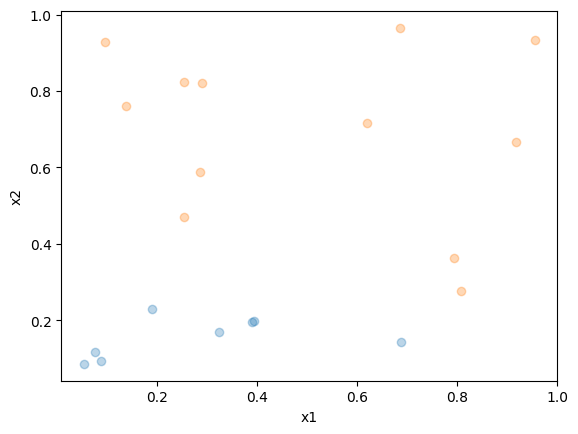

In [200]:
import matplotlib.pyplot as plt

def plotDataset(X, y):
  plt.xlabel('x1')
  plt.ylabel('x2')
  for k in set(y):
    plt.plot(X[:,0][y==k],X[:,1][y==k], 'o', alpha=0.3)

plotDataset(X, y)

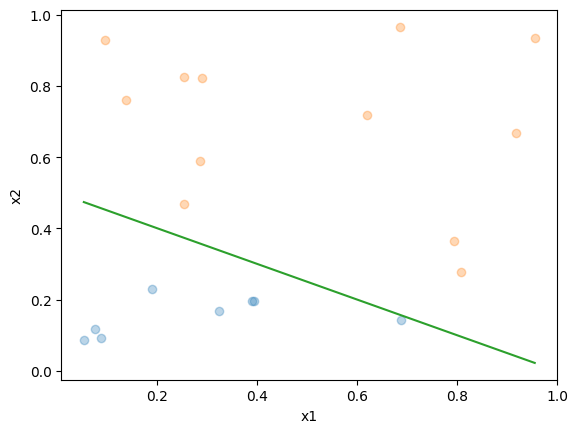

In [201]:
def plotHiperplano(X, y, vetor, intercept=0):
  x0min = min(X[:,0])
  x0max = max(X[:,0])
  xs = np.linspace(x0min, x0max, num=2)
  ys = (-vetor[0] / vetor[1]) * xs - intercept / vetor[1]
  plt.plot(xs, ys)

plotDataset(X, y)
vetor_hiperplano = np.array(slop) * np.array([1, -1])
plotHiperplano(X, y, vetor_hiperplano, intercept)

In [202]:
def sign(a):
  return (a >= 0) * 2 -1

In [203]:
from abc import ABC, abstractmethod

class TrainingAlgorithm(ABC):
  @abstractmethod
  def getW(self, X, y, activation=None):
    pass

class PseudoInversa():
  def __init__(self, regularization=0):
    self.regularization = regularization
  def getW(self, X, y):
    return np.linalg.inv(X.T @ X + np.eye(X.shape[1])*self.regularization) @ X.T @ y

class DescidaGradiente(TrainingAlgorithm):
  def __init__(self, max_iter=500, learning_rate=0.01, regularization=0):
    self.max_iter = max_iter
    self.learning_rate = learning_rate
    self.regularization = regularization

  def getW(self, X, y):
    w = np.random.uniform(-1, 1, size=X.shape[1])
    for _ in range(self.max_iter):
      ypred = X @ w
      erros = y - ypred
      w *= 1 - self.regularization * self.learning_rate
      w += (X.T @ erros) * self.learning_rate
    return w


1.0
[ 0.54704863 -0.67410004 -2.22139763  0.61987385 -0.25447308  0.87434569]


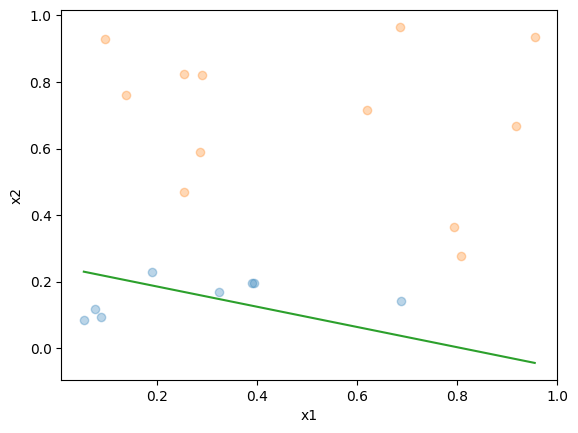

In [204]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

def include_bias(X):
  bias = np.ones((X.shape[0],1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, training_algorithm=DescidaGradiente()):
    self.w = None
    self.activation = sign
    self.training_algorithm = training_algorithm

  def fit(self, X, y):
    Xb = include_bias(X)
    self.w = self.training_algorithm.getW(Xb, y)

  def __pre_activation(self, X):
    Xb = include_bias(X)
    return Xb @ self.w

  def predict(self, X):
    a = self.__pre_activation(X)
    ypred = self.activation(a)
    return ypred

perceptron = Perceptron()
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(accuracy_score(y, ypred))
print(perceptron.w)
plotDataset(X, y)
# plotDataset(X, ypred)
plotHiperplano(X, y, perceptron.w[1:], perceptron.w[0])

0.84
[ 0.54704863 -0.67410004 -2.22139763  0.61987385 -0.25447308  0.87434569]


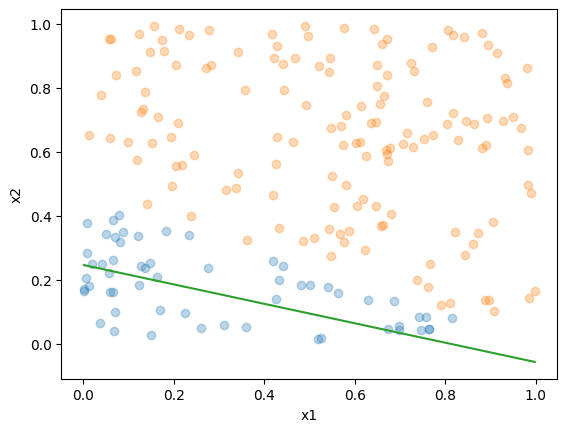

In [205]:
Xte, yte = criaDataset(200, slop, intercept)
ypred = perceptron.predict(Xte)
print(accuracy_score(yte, ypred))
print(perceptron.w)
plotDataset(Xte, yte)
# plotDataset(X, ypred)
plotHiperplano(Xte, yte, perceptron.w[1:], perceptron.w[0])

In [216]:
regularization=1
algs = [PseudoInversa(regularization=regularization),
        DescidaGradiente(regularization=regularization)]
for alg in algs:
  clf = Perceptron(alg)
  clf.fit(X,y)
  print(accuracy_score(y, clf.predict(X)), accuracy_score(yte, clf.predict(Xte)))

1.0 0.845
1.0 0.845
